<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Vivian!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">üìù
    

__Reviewer's comment ‚Ññ1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student —Åomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ2__

You're missing the introductory part of the project. In which you have to describe in the markdown cell the purpose of the study and the course of action. So that the customer immediately understands what the project is about

I'm going to show the significant trends and patterns of Instacart customer shopping behavior using a modified dataset. First, I will clean the imported data and reduce the amount of duplicates throughout the dataset. Then, I will answer important questions such as what day of the week Instacart customers shop the most, what are the peak shopping hours, and what are the most popular products bought. Towards the end of this project, I will have convenient graphs and brief summaries to clearly show the trends and patterns I want to highlight. 

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ3__

All right

In [1]:
import pandas as pd 
insta_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')

<div class="alert alert-block alert-warning">üìù
    

__Reviewer's comment ‚Ññ1__

All necessary libraries should be unloaded at the beginning of the project in one code cell

In [2]:
insta_orders.describe()

order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564685e+05   51414.000000       5.000000       1.000000   
50%    1.709522e+06  102633.000000      11.000000       3.000000   
75%    2.562990e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478967.000000           450148.000000  
mean           13.446676               11.101751  
std             4.224986                9.189975  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000                7.000000  
75%            16.000000               15.000000  
max            23.000000               30.000000

We can see the average day of the week and hour of day products are bought. We can also see the min and max for both order day of the week and hour of day. 

<div class="alert alert-block alert-warning">üìù
    

__Reviewer's comment ‚Ññ1__

It would be good to comment on the data somehow

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [3]:
# Check for duplicated orders
insta_orders.duplicated().sum()

15

In [4]:
# Check for all orders placed Wednesday at 2:00 AM
insta_orders.columns
insta_2am_wed = insta_orders[(insta_orders['order_dow'] == 3)&(insta_orders['order_hour_of_day'] == 2)]
insta_2am_wed

order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                      7.0  
18420                     11.0  
24691                      9.0  
...                        ...  
457013                    30.0  
458816                     4.0  
459635                    21.0  
468324                     3.0  
477526                     3.0  

[121 rows x 6 columns]

In [5]:
# Remove duplicate orders
insta_orders = insta_orders.drop_duplicates()

In [6]:
# Double check for duplicate rows
insta_orders.duplicated().sum()

0

In [7]:
# Double check for duplicate order IDs only
order_id_check = insta_orders[insta_orders.duplicated(subset='order_id', keep=False)].sum()
order_id_check

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

Duplicate checking is the basis of data preprocessing

### `products` data frame

In [8]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [9]:
# Check for just duplicate product IDs
products.columns
product_id_check = products[products.duplicated(subset='product_id', keep=False)].sum()
product_id_check

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [10]:
# Check for just duplicate product names (convert names to lowercase to compare better)
product_name_check = products[products['product_name'].str.lower().duplicated()].sum()
product_name_check

product_id       35284576
aisle_id           132756
department_id       27601
dtype: int64

In [11]:
# Check for duplicate product names that aren't missing
product_name_check.nunique()

3

### `departments` data frame

In [12]:
departments

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [13]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


### `aisles` data frame

In [14]:
aisles

aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]

In [15]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### `order_products` data frame

In [16]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [17]:
# Double check for any other tricky duplicates
order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

STUDENT COMMENT: 

I replaced my code with the example provided, thank you! I have a question, what was wrong with my code exactly? My code is listed below and any insight helps, thanks again! 

order_products['order_id'].nunique() + order_products['product_id'].nunique()

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ1__

We need to check for duplicate columns: 'order_id` and 'product_id'
    
STUDENT COMMENT 
    
I accidentally turned this comment into a code type cell.
    
Also, I changed the above code to check only for duplicates in both the 'order_id' and 'product_id' columns.

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ2__

Please see an example:
    
    order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ3__

Now correct

## Find and remove missing values


### `products` data frame

In [18]:
products[products['product_name'].isna()].sum()

product_id       31706543
product_name            0
aisle_id           125800
department_id       26418
dtype: object

In [19]:
# Are all of the missing product names associated with aisle ID 100?
aisle_100 = products[(products['aisle_id'] == 100)]
aisle_100.sum()

product_id       31706543
product_name            0
aisle_id           125800
department_id       26418
dtype: object

In [20]:
# Are all of the missing product names associated with department ID 21?
dept_id_21 = products[products['department_id']==21].sum()
dept_id_21

product_id       31706543
product_name            0
aisle_id           125800
department_id       26418
dtype: object

In [21]:
# What is this ailse and department?
aisle_name = aisles.loc[aisles['aisle_id'] == 100, 'aisle'].values[0]
department_name = departments.loc[departments['department_id'] == 21, 'department'].values[0]
print(aisle_name, department_name) 

missing missing


In [22]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

You chose the most correct way to replace the omissions in the categorical column. Well done!)

### `orders` data frame

In [23]:
insta_orders[insta_orders['order_id'].isna()].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [24]:
# Are there any missing values where it's not a customer's first order?
insta_orders[insta_orders['days_since_prior_order'].isna()].sum()

order_id                  4.919328e+10
user_id                   2.977022e+09
order_number              2.881700e+04
order_dow                 7.935500e+04
order_hour_of_day         3.926730e+05
days_since_prior_order    0.000000e+00
dtype: float64

### `order_products` data frame

In [25]:
order_products[order_products['add_to_cart_order'].isna()].sum()

order_id             1.290645e+09
product_id           2.030451e+07
add_to_cart_order    0.000000e+00
reordered            3.190000e+02
dtype: float64

In [26]:
# What are the min and max values in this column?
minimum = order_products['add_to_cart_order'].min()
maximum = order_products['add_to_cart_order'].max()
print(minimum, maximum)

1.0 64.0


In [27]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_atco = order_products[order_products['add_to_cart_order'].isna()]
missing_order_ids = missing_atco['order_id'].tolist()
missing_order_ids

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1717990,
 1564093,
 129627,
 264710,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2449164,
 2094761,
 3347453,
 1038146,
 2136777,
 2997021,
 844733,
 844733,
 2136777,
 813364,
 165801,
 2256933,
 171934,
 264710,
 2449164,
 2409109,
 3347453,
 813364,
 2926893,
 936852,
 1730767,
 1169835,
 733526,
 844733,
 293169,
 61355,
 903110,
 1968313,
 733526,
 2136777,
 2926893,
 404157,
 1386261,
 171934,
 3125735,
 747668,
 3308010,
 1169835,
 1800005,
 1961723,
 936852,
 2849370,
 3308010,
 61355,
 871281,
 1717990,
 813364,
 388234,
 61355,
 3125735,
 1959075,
 61355,
 3125735,
 1648217,
 171934,
 3125735,
 61355,
 1477139,
 1959075,
 1717990,
 1717990,
 61355,
 1717990,
 171934,
 1038146,
 3308010,
 3347453,
 102236,
 936852,
 171934,
 1730767,
 2926893,
 1021563,
 1832957,
 1959075,
 2256933,
 1968313,
 2721963,
 293169,
 102236,
 3125735,
 1959075,
 264710,


In [28]:
# Do all orders with missing values have more than 64 products?
missing_orders = order_products[(order_products['add_to_cart_order'] < 65) & (order_products['order_id'].isna())].sum()
missing_orders

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [29]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64', errors='ignore')
order_products['add_to_cart_order'].isna().sum()

836

<div class="alert alert-block alert-warning">üìù
    

__Reviewer's comment ‚Ññ1__


Replacing it with 999/-1 etc is not really good. Tip for the future, look, it's not good to try to fill in the blanks left and right. In real work - replace with zero now, then forget and average count a month later. Plus there may be times when a bonus purchase or gift, will cost zero. In general, if it is possible to leave skips as skips - and here it can be done, it is better to do so, the results, even if we want to calculate something - it will not affect the results

It is better to use this code construction:
    
    data[''] = data[''].astype('Int64', errors='ignore')
</div>

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [30]:
insta_orders['order_hour_of_day'].describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [31]:
insta_orders['order_dow'].describe()

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

### [A2] What time of day do people shop for groceries?

In [32]:
insta_orders['order_hour_of_day'].value_counts().sort_index().plot(
    x='hour', 
    kind='bar', 
    title='Orders By Time Of Day', 
    xlabel='Hour of Day', 
    ylabel='Number of Orders', 
    figsize=(8, 6), 
    rot=0
)

<AxesSubplot:title={'center':'Orders By Time Of Day'}, xlabel='Hour of Day', ylabel='Number of Orders'>

plt.show()

This graph shows not only when the physical store is open, but their peak hours are between 9am and 4pm. 

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ2__

Now correct

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.
    
In markdown cell 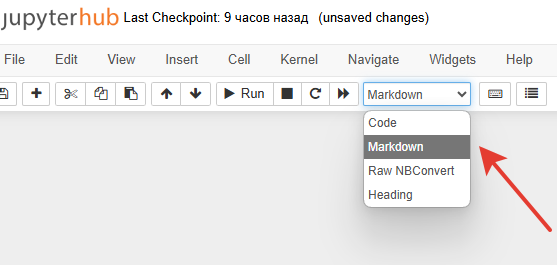    

### [A3] What day of the week do people shop for groceries?

<AxesSubplot:title={'center':'Orders By Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Orders'>

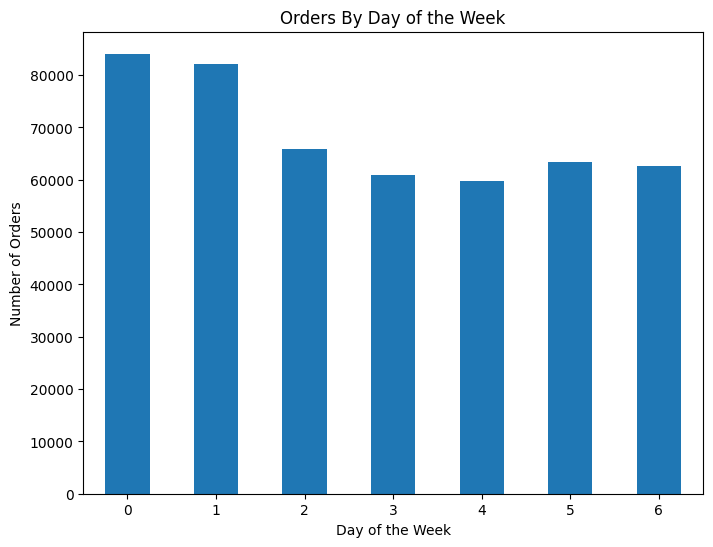

In [33]:
insta_orders['order_dow'].value_counts().sort_index().plot(
    x='hour', 
    kind='bar', 
    title='Orders By Day of the Week', 
    xlabel='Day of the Week', 
    ylabel='Number of Orders', 
    figsize=(8, 6), 
    rot=0
)

Products are most often bought on Mondays and Tuesdays. 

### [A4] How long do people wait until placing another order?

<AxesSubplot:title={'center':'Days Since Prior Order'}, xlabel='Duration', ylabel='Number of Orders'>

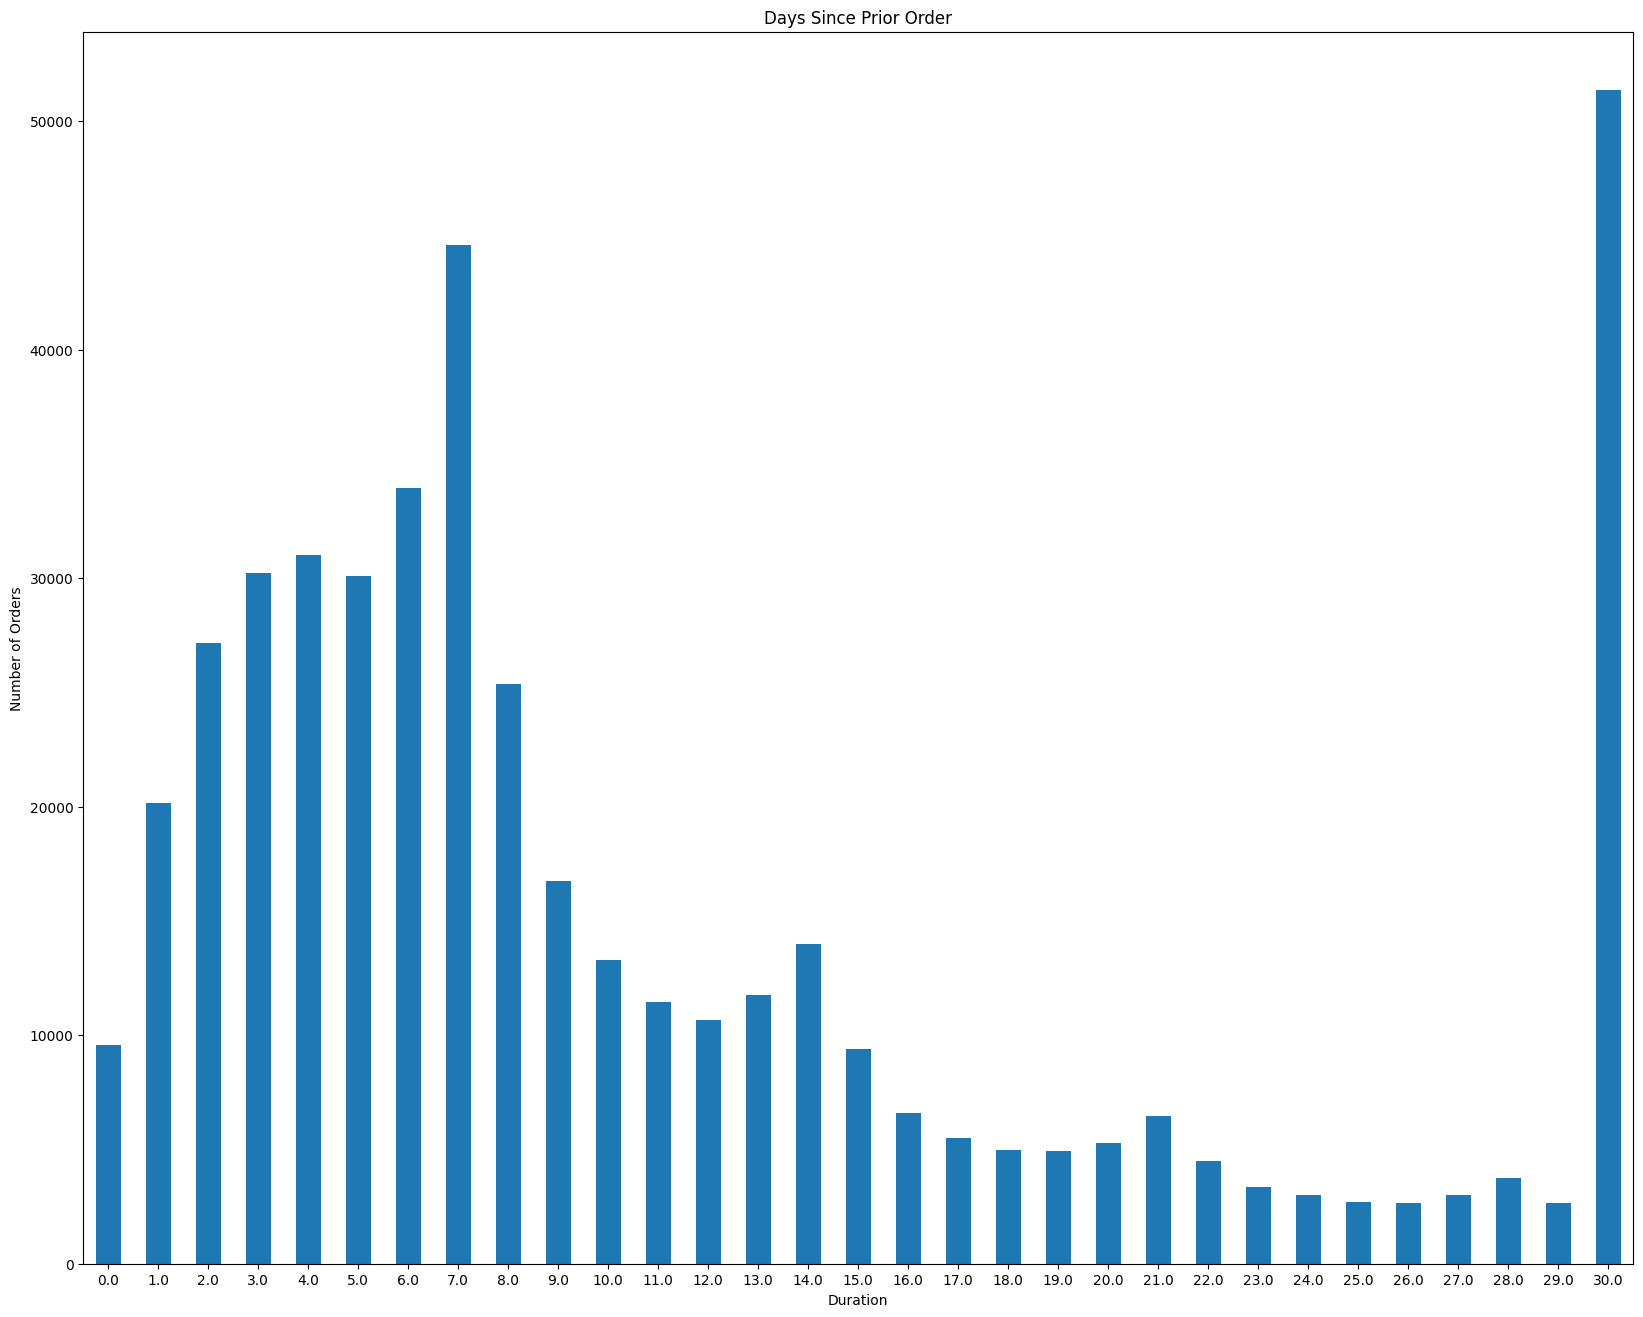

In [34]:
insta_orders['days_since_prior_order'].value_counts().sort_index().plot(
    x='hour', 
    kind='bar', 
    title='Days Since Prior Order', 
    xlabel='Duration', 
    ylabel='Number of Orders', 
    figsize=(20, 16), 
    rot=0
)

We can see that the largest spike is at the 30 day mark. Does this imply 30+ days? Or just 30 days? In any case, we see the largest spike at 30 days and 7 days. 

In [35]:
#Based on the graph, they wait either 7 days or 30 days before their next order

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ1__

The 0 values probably correspond to customers who placed more than one order on the same day.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [36]:
wed_orders = insta_orders[insta_orders['order_dow'] == 2]

In [37]:
sat_orders = insta_orders[insta_orders['order_dow'] == 5]

<AxesSubplot:ylabel='Frequency'>

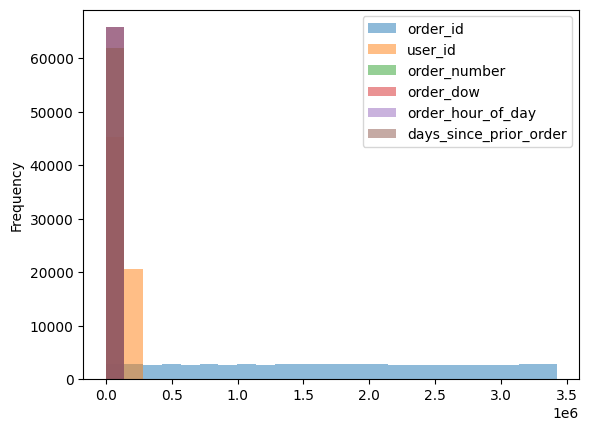

In [38]:
wed_orders.plot.hist(wed_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday')

<AxesSubplot:ylabel='Frequency'>

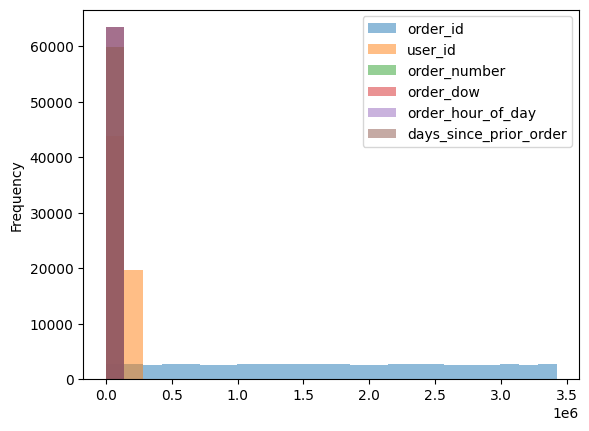

In [39]:
sat_orders.plot.hist(sat_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday')

I don't see a major difference between Wednesdays and Saturdays. 

### [B2] What's the distribution for the number of orders per customer?

In [40]:
orders_grouped = insta_orders.groupby('user_id')['order_id'].nunique()

<AxesSubplot:>

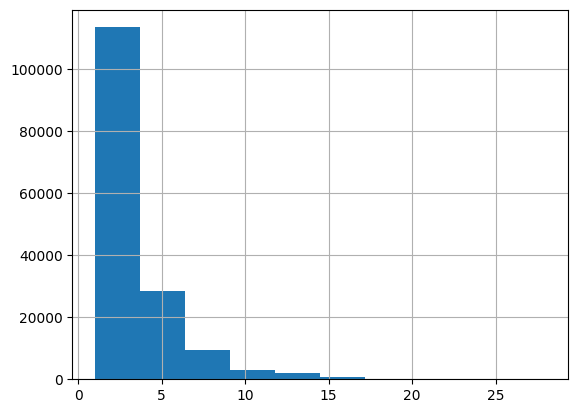

In [41]:
orders_grouped.hist()

Most customers are making 2-3 orders. 

### [B3] What are the top 20 popular products (display their id and name)?

In [42]:
top_20 = order_products['product_id'].value_counts().head(20).index

In [43]:
top_20 = products[products['product_id'].isin(top_20)][['product_id', 'product_name']]

array([[<AxesSubplot:title={'center':'product_id'}>]], dtype=object)

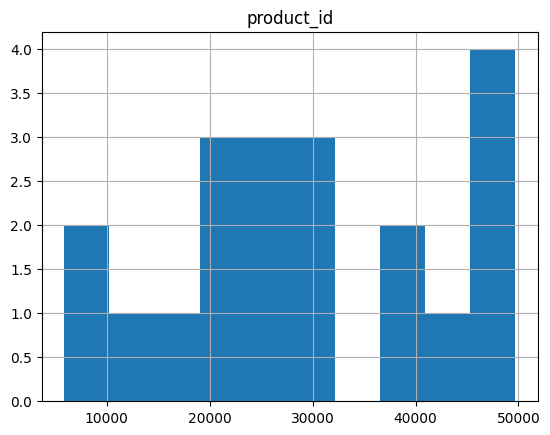

In [44]:
top_20_product_names = order_products[order_products['product_id'].isin(top_20)].merge(products, on='product_id', how='inner')
top_20.hist()

The most popular product has this product ID number. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [45]:
reordered_items = order_products[order_products['reordered'] == 1]

<AxesSubplot:>

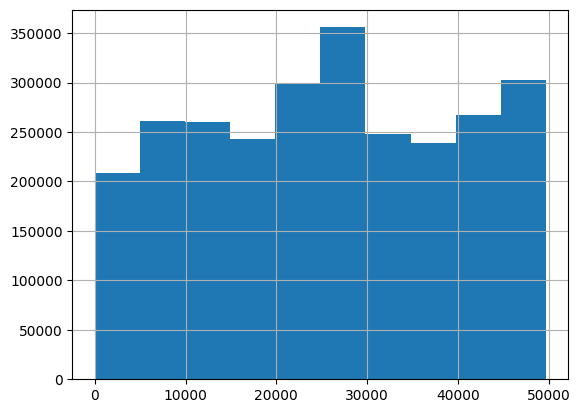

In [46]:
reordered_items['product_id'].hist()

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ1__

Error code 

The top twenty products that were reordered have these product ID numbers. 

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [47]:
top_20_cart = order_products[order_products['add_to_cart_order'] == 1]

<AxesSubplot:>

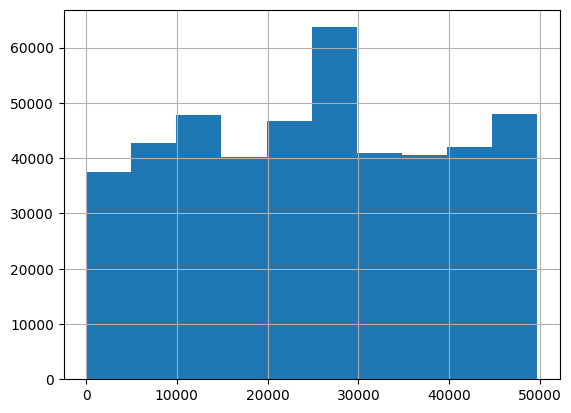

In [48]:
top_20_cart['product_id'].hist()

This shows the top twenty products were placed in the carts first, and their quantities. 

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ1__


It would be nice to add an overall output for the projec
</div>

<div class="alert alert-block alert-danger">‚úç
    

__Reviewer's comment ‚Ññ2__

In the conclusion of the project, you should aim to summarize the key outcomes, reflect on the objectives you achieved, and highlight the significance of your findings. Consider the following structure:

1. **Restate the Project Objectives**: Briefly mention the main goals of your project.
2. **Summarize Key Results**: Highlight the most important findings or outcomes you achieved during the project.
3. **eflect on Challenges and Learning**: Share any significant challenges you faced and how you overcame them, as well as what you learned during the process.
4. **Discuss Impact and Implications**: Explain how your project contributes to the field, solves a problem, or opens new opportunities for further research.
5. **End with a Future Outlook**: Mention potential next steps, improvements, or unanswered questions that could be explored in future work.
    
    
For example: *"In conclusion, this project successfully achieved its objectives by [briefly mention main results]. Despite challenges such as [name challenges], the experience provided valuable insights into [key learnings]. The outcomes contribute to [relevance to field or application], paving the way for future exploration into [potential next steps]."*

In conclusion, this project achieved its goals by using the Instacart dataset to give us insight of the patterns and behaviors of Instacart shopping behavior. The main objectives of this project were to clean the data, handle missing and duplicate values, and use exploratory data analysis to find significant trends in Instacart shopping.

Some of my objects were:

-To clean and preprocess the data to deal with missing and duplicate values.
-Visualize shopping patterns, such as peak hours, peak days of the week, and times between orders.
-Analyze reorder trends, highlight frequently ordered products and their reorder rates.
-Identify the number of first items added to carts, which helped show us the customer's shopping intent.

Some challenges I faced were when I had to deal with missing data, tricky duplicates, and double checking categorical columns. Fixing the dataset helped improve my skills and enhanced the dataset‚Äôs quality.

The insight I gained from this project is that we can make recommendations to shoppers and promote products during peak hours/days of the week. We could also use the information from this project to target customers based on the first item they put in their cart, etc.

In the future, we can use similar techniques to figure out which demographics are buying which products, what seasonal products should be advertised, or predict what shoppers will buy based on past purchases. 

<div class="alert alert-block alert-success">‚úîÔ∏è
    

__Reviewer's comment ‚Ññ3__


Otherwise it's greatüòä. Your project is begging for github =)   
    
Congratulations on the successful completion of the project üòäüëç
And I wish you success in new works üòä